In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([0, 0, 0, 1])  # Target outputs

In [21]:
def initialize_weights(n_features):
    weights = np.random.rand(n_features)  # Random weights
    bias = np.random.rand()              # Random bias
    return weights, bias

2. Activation Function
- We use a sigmoid function to calculate the predicted output $\hat{y}$.

In [22]:
# Sigmoid activation function for binary classification
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid (used for gradient calculation)
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))


In [23]:
def stochastic_gradient_descent(X, y, weights, bias, learning_rate=0.01, epochs=100):
    errors = []
    for epoch in range(epochs):
        for i in range(len(X)):
            # Forward pass
            net_input = np.dot(X[i], weights)

            
            prediction = sigmoid(net_input)
            
            # Calculate error
            error = y[i] - prediction
            errors.append(error)
            
            # Update weights
            weights += learning_rate * error * sigmoid_derivative(net_input) * X[i]
            bias += learning_rate * error * sigmoid_derivative(net_input)

    return weights, bias, errors

In [24]:
def batch_gradient_descent(X, y, weights, bias, learning_rate=0.01, epochs=100): 
    errors = [] 
    for epoch in range(epochs):
        # Arrays to store accumulated gradients
        weight_gradients = np.zeros_like(weights)
        bias_gradient = 0
        
        # Forward pass for all samples
        for i in range(len(X)):
            # Calculate net input and activation
            net_input = np.dot(X[i], weights) + bias
            prediction = sigmoid(net_input)
            
            # Calculate error
            error = y[i] - prediction
            errors.append(error)
            
            # Accumulate gradients
            weight_gradients += error * sigmoid_derivative(net_input) * X[i]
            bias_gradient += error * sigmoid_derivative(net_input)
        
        # Update weights and bias using average gradients
        weights += learning_rate * weight_gradients / len(X)
        bias += learning_rate * bias_gradient / len(X)
            
    return weights, bias, errors

In [25]:
# Initialize weights and bias
n_features = X.shape[1]
weights, bias = initialize_weights(n_features)

# Set hyperparameters
learning_rate = 0.1  # Learning rate
epochs = 100  # Number of training iterations

# Train using SGD
print("Training with SGD:")
weights_sgd, bias_sgd, errors_sgd = stochastic_gradient_descent(X, y, weights.copy(), bias, learning_rate, epochs)
print(f'Weights: {weights_sgd} and Bias: {bias_sgd}')

print("----------------------")

# Train using BGD
print("\nTraining with BGD:")
weights_bgd, bias_bgd, errors_bgd = batch_gradient_descent(X, y, weights.copy(), bias, learning_rate, epochs)
print(f'Weights: {weights_bgd} and Bias: {bias_bgd}')

Training with SGD:
Weights: [-0.12560736  0.27717035] and Bias: -2.7863610632104274
----------------------

Training with BGD:
Weights: [0.04464258 0.61019552] and Bias: -0.5437087162332259


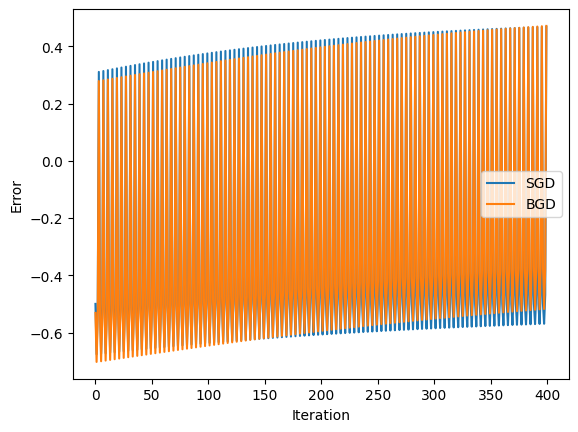

In [26]:
plt.plot(errors_sgd, label='SGD')
plt.plot(errors_bgd, label='BGD')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')